In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv('Churn_Modelling (1).csv')

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le = LabelEncoder()

In [6]:
df = df.apply(le.fit_transform)

In [7]:
print(df.head()) 
print(df.info()) 
print(df.describe()) 


   RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  \
0          0        2736     1115          228          0       0   24   
1          1        3258     1177          217          2       0   23   
2          2        2104     2040          111          0       0   24   
3          3        5435      289          308          0       0   21   
4          4        6899     1822          459          2       0   25   

   Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       2        0              0          1               1             5068   
1       1      743              0          0               1             5639   
2       8     5793              2          1               0             5707   
3       1        0              1          0               0             4704   
4       2     3696              0          1               1             3925   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       

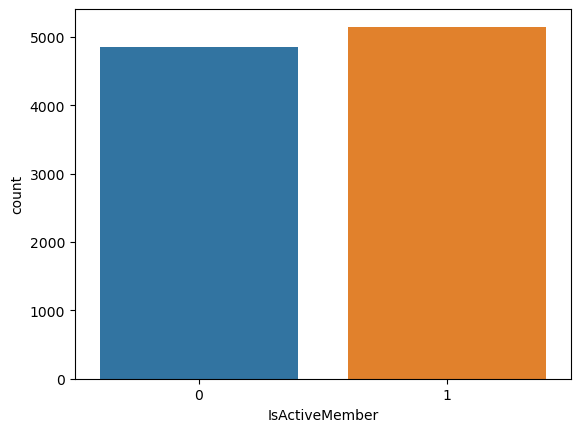

In [8]:
sns.countplot(x='IsActiveMember', data=df)
plt.show()


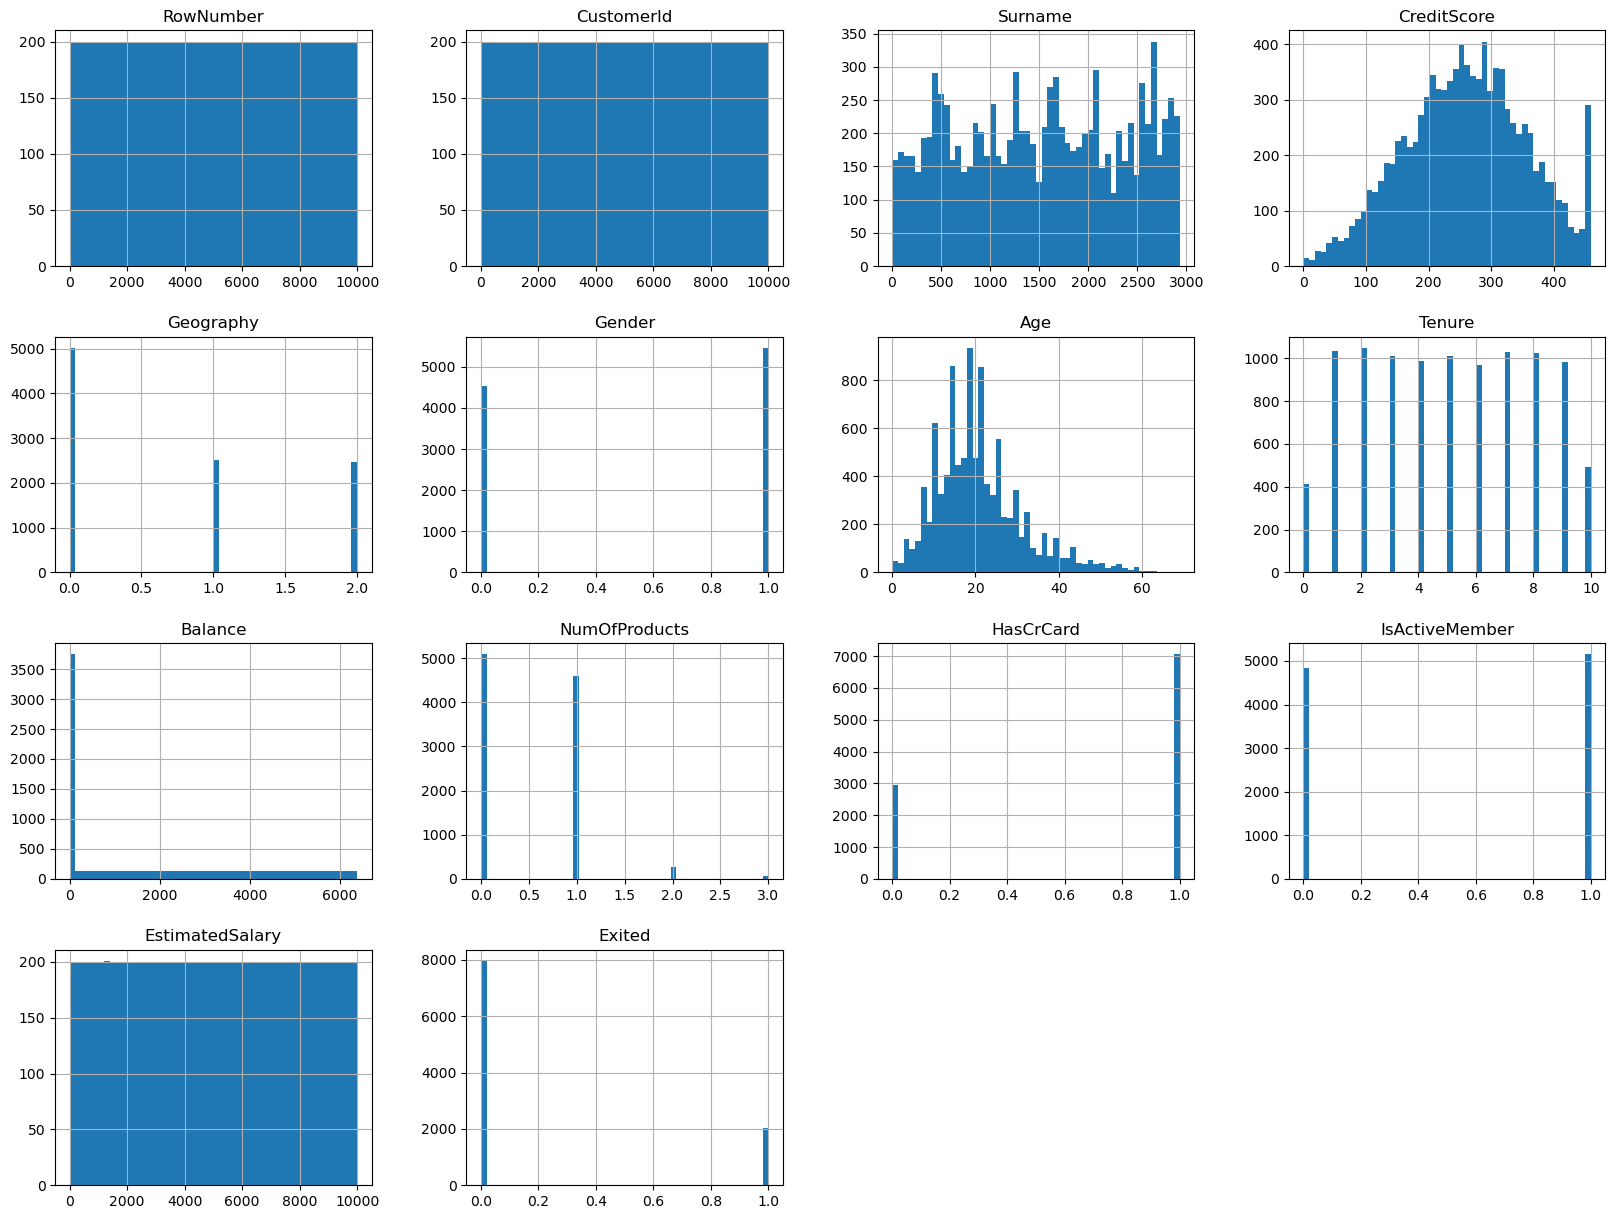

In [9]:
df.hist(bins=50, figsize=(20, 15))
plt.show()


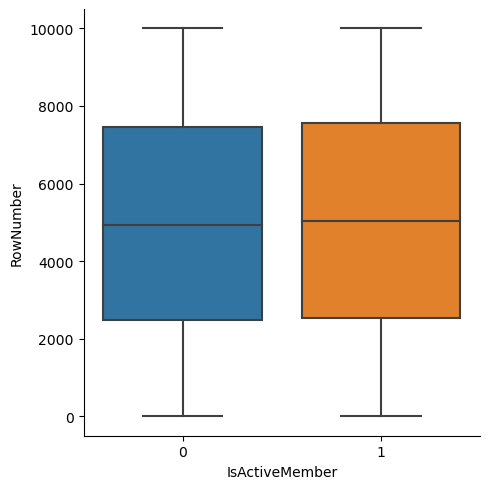

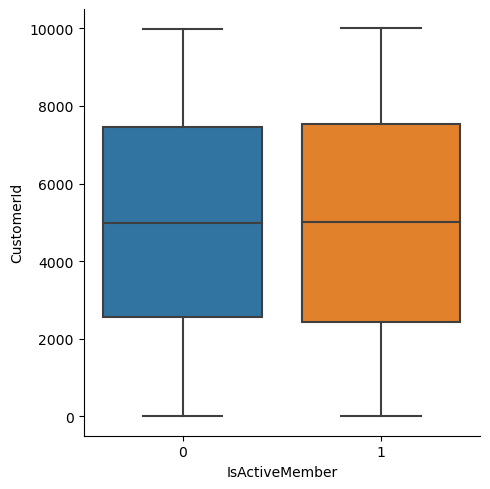

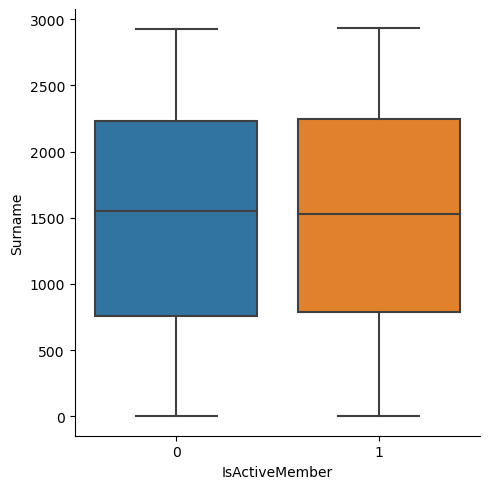

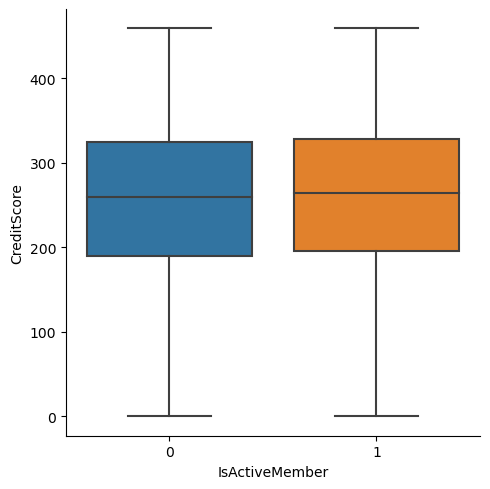

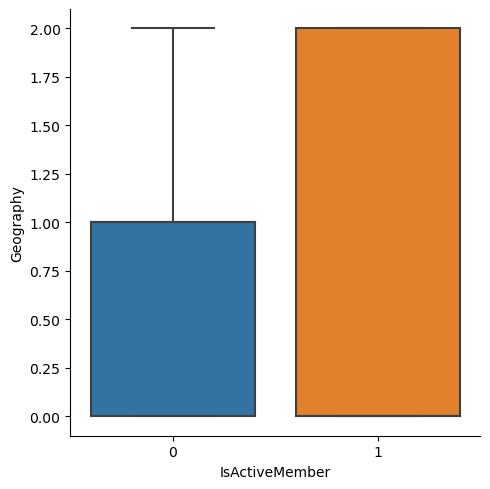

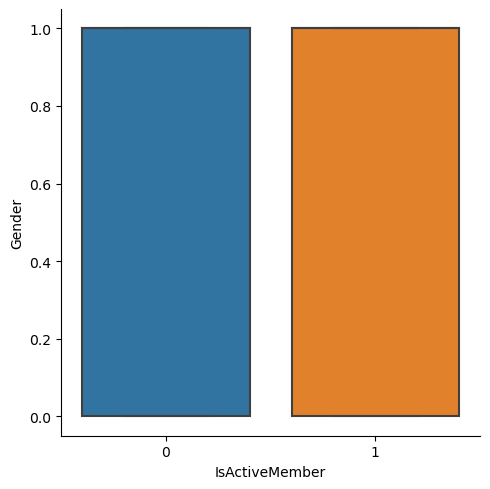

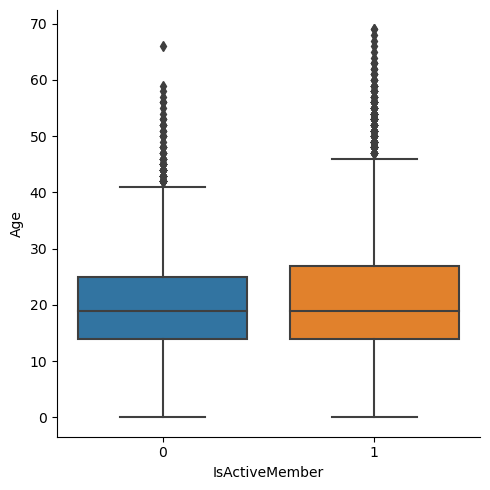

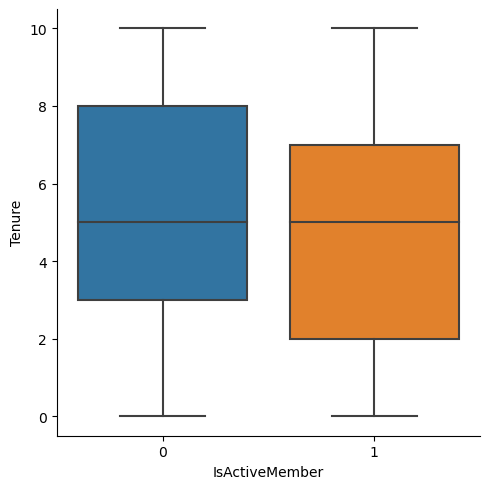

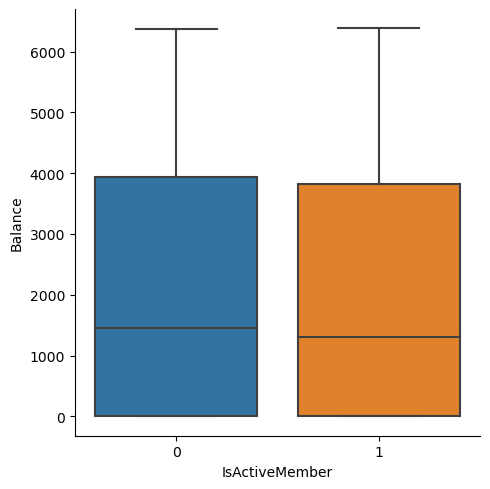

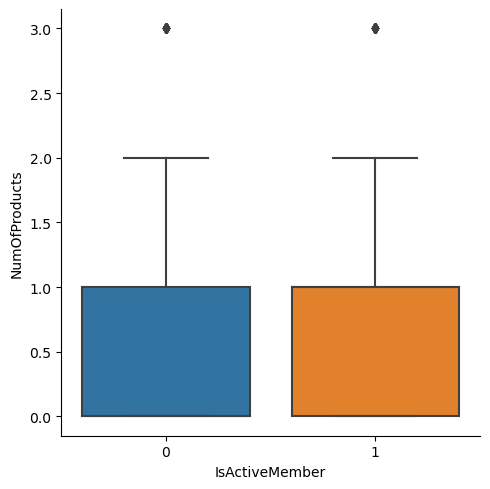

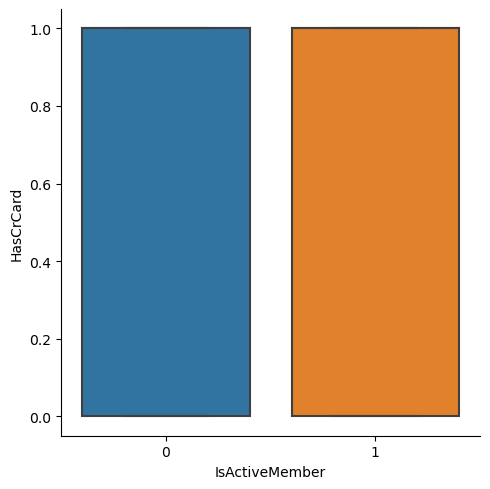

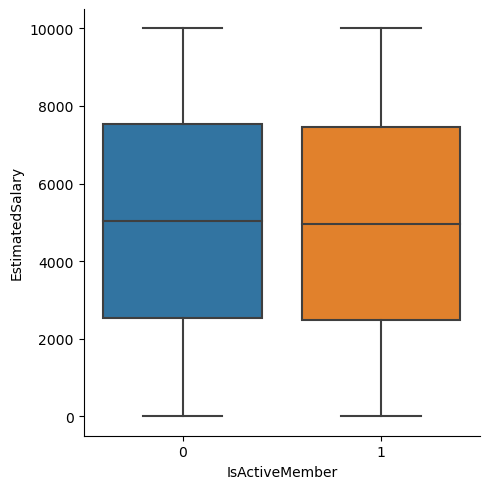

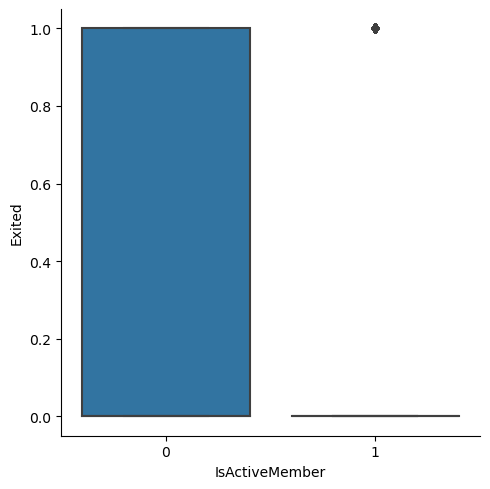

In [11]:
for feature in df.columns:
    if feature == 'IsActiveMember':
        continue
    sns.catplot(x='IsActiveMember', y=feature, kind='box', data=df)
    plt.show()


In [12]:
X = df.drop('IsActiveMember', axis=1)
y = df['IsActiveMember']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)



C:\Users\Risen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
y_pred = model.predict(X_test)

In [15]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[385 596]
 [350 669]]


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.39      0.45       981
           1       0.53      0.66      0.59      1019

    accuracy                           0.53      2000
   macro avg       0.53      0.52      0.52      2000
weighted avg       0.53      0.53      0.52      2000

